データサイエンス特別PG データサイエンス特論 第7回 東京電力の電力使用実績と熊谷市の最高気温の回帰分析

In [1]:
import pandas as pd
import openpyxl

# データをデータテーブルに読み込む
df = pd.read_excel('ds07_temp_power_work.xlsx')

# データフレームからX列とY列を取り出す
x = df[['熊谷市の最高気温(℃)']]
y = df[['電力使用実績(万kW)']]

# 最低値、最高値を確認 (.to_string() でデータ型の出力を抑制)
print('最高気温の最低値', x.min().to_string())
print('最高気温の最高値', x.max().to_string())
print('電力使用実績の最低値', y.min().to_string())
print('電力使用実績の最高値', y.max().to_string())

最高気温の最低値 熊谷市の最高気温(℃)    31.6
最高気温の最高値 熊谷市の最高気温(℃)    39.6
電力使用実績の最低値 電力使用実績(万kW)    3420
電力使用実績の最高値 電力使用実績(万kW)    5604


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 単回帰回帰分析を実施 (線形回帰のモデルを準備し、データを入力)
model_p1 = LinearRegression()
model_p1.fit(x, y)

# モデルと寄与率を出力
print('y= %.6f + %.6fx' % (model_p1.intercept_, model_p1.coef_))
print('寄与率 R^2:', model_p1.score(x, y))

y= -839.573897 + 157.214277x
寄与率 R^2: 0.3233540219227702


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 多項式回帰のために x に 2次の項を追加
pf = PolynomialFeatures(degree=2)
x2 = pf.fit_transform(x)  # x2 -> [1.00000e+00 3.22000e+01 1.03684e+03]
                          #        (バイアス項)  (1次の項)   (2次の項)

# 多項式回帰分析を実施 (線形回帰のモデルを準備し、2次の項を含むデータを入力)
model_p2 = LinearRegression()
model_p2.fit(x2, y)

# モデルと寄与率を出力
print('y= %.6f + %.6fx + %.6fx^2' 
      % (model_p2.intercept_, model_p2.coef_[0][1], model_p2.coef_[0][2]))
print('寄与率 R^2:', model_p2.score(x2, y))

y= -49727.487490 + 2938.644102x + -39.422610x^2
寄与率 R^2: 0.4360172674722307


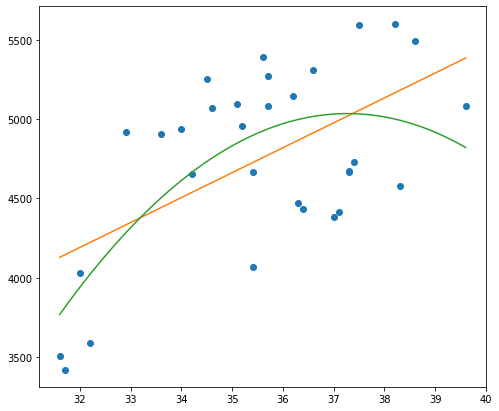

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 元データの散布図を作成
fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, 'o')

# 求めた単回帰分析の結果(直線)を描画
x_linspace = pd.DataFrame(np.linspace(x.min(), x.max(), 100), 
                          columns=['熊谷市の最高気温(℃)'])
ax1.plot(x_linspace, model_p1.predict(x_linspace))

# 多項式回帰分析の結果(曲線)を描画
x_linspace_pf = pf.fit_transform(x_linspace)
y_pred = model_p2.predict(x_linspace_pf)
ax1.plot(x_linspace, y_pred)

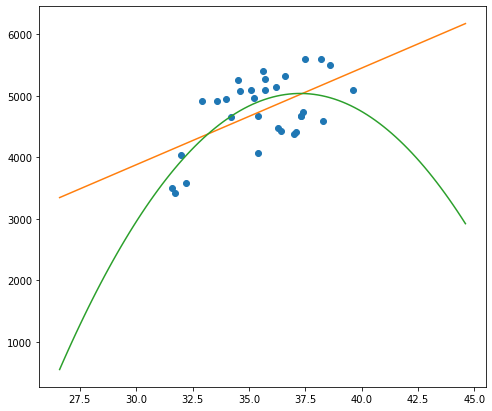

In [6]:
# 元データの散布図を作成し、求めた単回帰分析の結果(直線)を描画
fig = plt.figure(figsize=(8, 7))
ax2 = fig.add_subplot(111)
ax2.plot(x, y, 'o')

# 求めた単回帰分析の結果(直線)を描画
x_linspace = pd.DataFrame(np.linspace(x.min()-5.0, x.max()+5.0, 100), 
                          columns=['熊谷市の最高気温(℃)'])
ax2.plot(x_linspace, model_p1.predict(x_linspace))

# 多項式回帰分析の結果(曲線)を描画
x_linspace_pf = pf.fit_transform(x_linspace)
y_pred = model_p2.predict(x_linspace_pf)
ax2.plot(x_linspace, y_pred)